In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import polars as pl
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from umap.parametric_umap import ParametricUMAP
embedder = ParametricUMAP()
df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz", sep="\t", compression="gzip")

# Filtra el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,7:]
df_filtrado_test = df_test.iloc[:,7:]

labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

embedder = ParametricUMAP()
embedding = embedder.fit_transform(X_train)

test_embedding = embedding.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5).fit(embedding.embedding_, y_train)

2024-06-05 09:22:16.842151: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-05 09:22:16.842540: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 09:22:16.845187: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 09:22:16.877808: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 09:22:17.556074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [7]:
import pandas as pd
df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz", sep="\t", compression="gzip")

/tmp/ipykernel_1252143/2446618106.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz", sep="\t", compression="gzip")


In [8]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,7:]
df_filtrado_test = df_test.iloc[:,7:]

In [14]:
df_training

,Unnamed: 0,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000813,3000378,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.000,6,10,6,...,0,0,0,0,0,0,0,0,0,0
1,1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.000,5,8,5,...,0,0,0,0,0,0,0,0,0,0
2,2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.000,4,9,5,...,0,0,0,0,0,0,0,0,0,0
3,3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.000,5,8,6,...,0,0,0,0,0,0,0,0,0,0
4,4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.000,7,11,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,5947,SRR4449966,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,10,13,4,...,0,0,0,0,0,0,0,0,0,0
5948,5948,SRR4449967,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,8,13,4,...,0,0,0,0,0,0,0,0,0,0
5949,5949,SRR4449972,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,8,13,5,...,0,0,0,0,0,0,0,0,0,0
5950,5950,SRR4449973,Salmonella,enterica,ciprofloxacin,Susceptible,0.015,9,14,5,...,0,0,0,0,0,0,0,0,0,0


In [9]:
embedding = embedder.fit_transform(df_filtrado)

Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


2099/2099 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.1723
Epoch 2/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1520
Epoch 3/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1499
Epoch 4/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1487
Epoch 5/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1481
Epoch 6/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1478
Epoch 7/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1476
Epoch 8/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1472
Epoch 9/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1470
Epoch 10/10
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1470


{'loss': [0.1606682687997818, 0.15127484500408173, 0.14957214891910553, 0.14860790967941284, 0.14803019165992737, 0.1477919965982437, 0.14747168123722076, 0.147264301776886, 0.1469668745994568, 0.14682936668395996]}


Text(0.5, 0, 'Epoch')

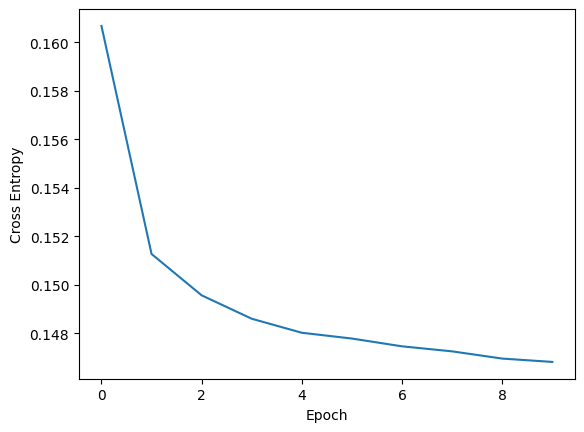

In [11]:
import matplotlib.pyplot as plt
print(embedder._history)
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

In [12]:
embedder.save('/home/haydeeperuyero/camda24/hackaton')

Keras encoder model saved to /home/haydeeperuyero/camda24/hackaton/encoder.keras
Keras full model saved to /home/haydeeperuyero/camda24/hackaton/parametric_model.keras
Pickle of ParametricUMAP model saved to /home/haydeeperuyero/camda24/hackaton/model.pkl


In [13]:
from umap.parametric_umap import load_ParametricUMAP
embedder = load_ParametricUMAP('/home/haydeeperuyero/camda24/hackaton')

Pickle of ParametricUMAP model loaded from /home/haydeeperuyero/camda24/hackaton/model.pkl
Keras encoder model loaded from /home/haydeeperuyero/camda24/hackaton/encoder.keras


In [17]:
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

embedder = ParametricUMAP()
embedding = embedder.fit_transform(X_train)
#trans = umap.UMAP(n_neighbors=10, n_components=3, min_dist=0.5, metric='cosine', random_state=42).fit(X_train)

test_embedding = embedding.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5).fit(embedding.embedding_, y_train)

y_pred = knn.predict(test_embedding)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)


Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1643/1643 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.1788
Epoch 2/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1539
Epoch 3/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1518
Epoch 4/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1508
Epoch 5/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1504
Epoch 6/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1498
Epoch 7/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1496
Epoch 8/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1493
Epoch 9/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1492
Epoch 10/10
1643/1643 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1489


AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [18]:
import umap

labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)


# Reducir dimensionalidad con UMAP
umap_transformer = umap.UMAP(n_components=10, random_state=42)
X_train_umap = umap_transformer.fit_transform(X_train)
X_test_umap = umap_transformer.transform(X_test)


/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construir la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_umap.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Supongamos que es una clasificación binaria
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Entrenar la red neuronal
history = model.fit(X_train_umap, y_train, epochs=50, batch_size=32, validation_data=(X_test_umap, y_test))


Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.4730 - val_accuracy: 0.8052 - val_loss: 0.3764
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.3798 - val_accuracy: 0.8212 - val_loss: 0.3654
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.3680 - val_accuracy: 0.8195 - val_loss: 0.3549
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.3687 - val_accuracy: 0.8254 - val_loss: 0.3588
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.3691 - val_accuracy: 0.8052 - val_loss: 0.3500
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038 - loss: 0.3787 - val_accuracy: 0.7993 - val_loss: 0.3620
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.3737 - val_accuracy: 0.8119 - val_loss: 0.3538
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8175 - loss: 0.3561 - val_accuracy: 0.

In [21]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_umap, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.8393 - loss: 0.3287
Loss: 0.3293015658855438, Accuracy: 0.8354324102401733


In [24]:
import tensorflow as tf
#import parametric_umap
import umap
from umap.parametric_umap import ParametricUMAP
#embedder = ParametricUMAP()


labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)


# Definir y entrenar el modelo UMAP paramétrico
umap_model = ParametricUMAP(n_components=10, random_state=42)
umap_model.fit(X_train, y_train)

# Transformar los datos
X_train_umap = umap_model.transform(X_train)
X_test_umap = umap_model.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_umap.embedding_, y_train)

y_pred = knn.predict(X_test_umap)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1969/1969 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.1727
Epoch 2/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1530
Epoch 3/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1510
Epoch 4/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1503
Epoch 5/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1498
Epoch 6/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1494
Epoch 7/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1492
Epoch 8/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1489
Epoch 9/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1486
Epoch 10/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1483
Epoch 1/50


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7506 - loss: 0.6076 - val_accuracy: 0.8170 - val_loss: 0.3770
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038 - loss: 0.4014 - val_accuracy: 0.8203 - val_loss: 0.3668
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.3785 - val_accuracy: 0.8153 - val_loss: 0.3609
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8102 - loss: 0.3682 - val_accuracy: 0.8153 - val_loss: 0.3702
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.3773 - val_accuracy: 0.8195 - val_loss: 0.3553
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.3772 - val_accuracy: 0.8136 - val_loss: 0.3606
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.3752 - val_accuracy: 0.7968 - val_loss: 0.3715
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.3617 - val_accuracy: 0.8094 - val_

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from umap.parametric_umap import ParametricUMAP

# Cargar el dataset
input_file = "/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz"
df = pd.read_csv(input_file, sep="\t", compression="gzip")

# Crear la carpeta de salida
output_folder = "output_parametric-umap"
os.makedirs(output_folder, exist_ok=True)

# Filtrar el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtrar el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 7:]
df_filtrado_test = df_test.iloc[:, 7:]

# Etiquetas
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
encoded_labels = label_encoder.fit_transform(labels)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

# Inicializar Parametric UMAP
embedder = ParametricUMAP()

# Ajustar y transformar los datos de entrenamiento
embedding_train = embedder.fit_transform(X_train)

# Transformar los datos de prueba
embedding_test = embedder.transform(X_test)

# Entrenar un clasificador KNN en los datos de entrenamiento embebidos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(embedding_train, y_train)

# Hacer predicciones en los datos de prueba embebidos
y_pred = knn.predict(embedding_test)

# Generar e imprimir el informe de clasificación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

# Guardar el informe de clasificación en un archivo
with open(os.path.join(output_folder, "classification_report.txt"), "w") as f:
    f.write(report)


# Crear y guardar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN with Parametric UMAP')
plt.savefig(os.path.join(output_folder, "confusion_matrix.png"))
plt.close()


/opt/conda/envs/umap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-06 22:17:04.743171: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-06 22:17:04.743573: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 22:17:04.746054: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 22:17:04.778505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performanc

Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1604/1604 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1748
Epoch 2/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1460
Epoch 3/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1447
Epoch 4/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1443
Epoch 5/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1438
Epoch 6/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1435
Epoch 7/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1434
Epoch 8/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1432
Epoch 9/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1430
Epoch 10/10
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1428
              precision    recall  f1-score   support

   Resistant       0.69      0.68      0.69       276
 Susceptible       0.90      0.91      0.91       915

    accuracy                           0.86      1191
   macro avg       0.80      0.80      0.80      1191
weighted avg       0.86      0.86     

In [4]:
# Cargar el dataset
input_file = "/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedStrictBiofiltered.tsv.gz"
df = pd.read_csv(input_file, sep="\t", compression="gzip")

# Crear la carpeta de salida
output_folder = "output_parametric-umap-stric"
os.makedirs(output_folder, exist_ok=True)

# Filtrar el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtrar el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 7:]
df_filtrado_test = df_test.iloc[:, 7:]

# Etiquetas
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
encoded_labels = label_encoder.fit_transform(labels)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

# Inicializar Parametric UMAP
embedder = ParametricUMAP()

# Ajustar y transformar los datos de entrenamiento
embedding_train = embedder.fit_transform(X_train)

# Transformar los datos de prueba
embedding_test = embedder.transform(X_test)

# Entrenar un clasificador KNN en los datos de entrenamiento embebidos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(embedding_train, y_train)

# Hacer predicciones en los datos de prueba embebidos
y_pred = knn.predict(embedding_test)

# Generar e imprimir el informe de clasificación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

# Guardar el informe de clasificación en un archivo
with open(os.path.join(output_folder, "classification_report.txt"), "w") as f:
    f.write(report)


# Crear y guardar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN with Parametric UMAP')
plt.savefig(os.path.join(output_folder, "confusion_matrix.png"))
plt.close()


/tmp/ipykernel_1668037/1106590343.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep="\t", compression="gzip")


Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


3867/3867 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 0.2255
Epoch 2/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 0.2144
Epoch 3/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.2135
Epoch 4/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.2134
Epoch 5/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 0.2130
Epoch 6/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.2127
Epoch 7/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 0.2128
Epoch 8/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.2130
Epoch 9/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 0.2128
Epoch 10/10
3867/3867 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.2126
              precision    recall  f1-score   support

   Resistant       0.64      0.78      0.71       276
 Susceptible       0.93      0.87      0.90       915

    accuracy                           0.85      1191
   macro avg       0.79      0.83      0.80      1191
weighted avg       0.86      0.85     

In [5]:
input_file = "/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz"
df = pd.read_csv(input_file, sep="\t", compression="gzip")

# Crear la carpeta de salida
output_folder = "output_parametric_umap_RF"
os.makedirs(output_folder, exist_ok=True)

# Filtrar el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtrar el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 7:]
df_filtrado_test = df_test.iloc[:, 7:]

# Etiquetas
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
encoded_labels = label_encoder.fit_transform(labels)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

# Inicializar Parametric UMAP
embedder = ParametricUMAP()

# Ajustar y transformar los datos de entrenamiento
embedding_train = embedder.fit_transform(X_train)

# Transformar los datos de prueba
embedding_test = embedder.transform(X_test)

# Entrenar un clasificador Random Forest en los datos de entrenamiento embebidos
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(embedding_train, y_train)

# Hacer predicciones en los datos de prueba embebidos
y_pred = rf.predict(embedding_test)

# Generar e imprimir el informe de clasificación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

# Guardar el informe de clasificación en un archivo
with open(os.path.join(output_folder, "classification_report.txt"), "w") as f:
    f.write(report)

# Crear y guardar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest with Parametric UMAP')
plt.savefig(os.path.join(output_folder, "confusion_matrix.png"))
plt.close()

/tmp/ipykernel_1668037/2165522919.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep="\t", compression="gzip")


Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1606/1606 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1715
Epoch 2/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1455
Epoch 3/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1442
Epoch 4/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1435
Epoch 5/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1433
Epoch 6/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1428
Epoch 7/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1426
Epoch 8/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1425
Epoch 9/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1423
Epoch 10/10
1606/1606 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1422
              precision    recall  f1-score   support

   Resistant       0.69      0.76      0.72       276
 Susceptible       0.92      0.90      0.91       915

    accuracy                           0.87      1191
   macro avg       0.81      0.83      0.82      1191
weighted avg       0.87      0.87     

In [ ]:
# Transformar el conjunto de prueba completo utilizando el embedder ajustado
X_scaled_test = scaler.transform(df_filtrado_test)
test_embedding_full = embedder.transform(X_scaled_test)

# Hacer predicciones en el conjunto de prueba completo
test_predictions = knn.predict(test_embedding_full)
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Guardar las predicciones en un archivo CSV
test_predictions_df = pd.DataFrame({
    'genus': df_test['genus'],
    'species': df_test['species'],
    'accession': df_test['accession'],
    'antibiotic': df_test['antibiotic'],
    'status': test_predictions_labels
})
test_predictions_df.to_csv(os.path.join(output_folder, "test_predictions.csv"), index=False)

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from umap.parametric_umap import ParametricUMAP

# Cargar el dataset
input_file = "/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz"
df = pd.read_csv(input_file, sep="\t", compression="gzip")

# Crear la carpeta de salida
output_folder = "output_parametric_umap-5fold"
os.makedirs(output_folder, exist_ok=True)

# Filtrar el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtrar el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 7:]
df_filtrado_test = df_test.iloc[:, 7:]

# Etiquetas
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
encoded_labels = label_encoder.fit_transform(labels)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

# Configurar 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

reports = []
confusion_matrices = []

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled, encoded_labels)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]

    # Inicializar Parametric UMAP
    embedder = ParametricUMAP()

    # Ajustar y transformar los datos de entrenamiento
    embedding_train = embedder.fit_transform(X_train)

    # Transformar los datos de prueba
    embedding_test = embedder.transform(X_test)

    # Entrenar un clasificador Random Forest en los datos de entrenamiento embebidos
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(embedding_train, y_train)

    # Hacer predicciones en los datos de prueba embebidos
    y_pred = rf.predict(embedding_test)

    # Generar e imprimir el informe de clasificación
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    reports.append(report)

    # Crear y guardar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.savefig(os.path.join(output_folder, f"confusion_matrix_fold_{fold + 1}.png"))
    plt.close()

# Promediar los informes de clasificación y la matriz de confusión
average_report = {
    'precision': np.mean([r['macro avg']['precision'] for r in reports]),
    'recall': np.mean([r['macro avg']['recall'] for r in reports]),
    'f1-score': np.mean([r['macro avg']['f1-score'] for r in reports])
}

# Guardar el informe promedio de clasificación en un archivo
with open(os.path.join(output_folder, "classification_report_avg.txt"), "w") as f:
    f.write(f"Average Precision: {average_report['precision']}\n")
    f.write(f"Average Recall: {average_report['recall']}\n")
    f.write(f"Average F1-Score: {average_report['f1-score']}\n")

# Promediar las matrices de confusión
average_cm = np.mean(confusion_matrices, axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix - 5-Fold Cross Validation')
plt.savefig(os.path.join(output_folder, "confusion_matrix_avg.png"))
plt.close()



/tmp/ipykernel_1668037/2328433072.py:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep="\t", compression="gzip")


Fold 1
Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1603/1603 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1703
Epoch 2/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1463
Epoch 3/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1448
Epoch 4/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1442
Epoch 5/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1437
Epoch 6/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1433
Epoch 7/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1432
Epoch 8/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1429
Epoch 9/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1428
Epoch 10/10
1603/1603 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1426
Fold 2
Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1713
Epoch 2/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1459
Epoch 3/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1446
Epoch 4/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1437
Epoch 5/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1433
Epoch 6/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1428
Epoch 7/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1426
Epoch 8/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1425
Epoch 9/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1423
Epoch 10/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1423
Fold 3
Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1612/1612 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1710
Epoch 2/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1457
Epoch 3/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1445
Epoch 4/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1437
Epoch 5/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1435
Epoch 6/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1433
Epoch 7/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1431
Epoch 8/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1428
Epoch 9/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1429
Epoch 10/10
1612/1612 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1425
Fold 4
Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1605/1605 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1707
Epoch 2/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1445
Epoch 3/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1431
Epoch 4/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1426
Epoch 5/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1421
Epoch 6/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1417
Epoch 7/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1416
Epoch 8/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1415
Epoch 9/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1413
Epoch 10/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1411
Fold 5
Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1608/1608 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1677
Epoch 2/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1440
Epoch 3/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1429
Epoch 4/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1423
Epoch 5/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1419
Epoch 6/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1416
Epoch 7/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1415
Epoch 8/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1412
Epoch 9/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1410
Epoch 10/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1411


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from umap.parametric_umap import ParametricUMAP

# Cargar el dataset
input_file = "/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz"
df = pd.read_csv(input_file, sep="\t", compression="gzip")

# Crear la carpeta de salida
output_folder = "output_parametric_umap-red2"
os.makedirs(output_folder, exist_ok=True)

# Filtrar el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtrar el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 7:]
df_filtrado_test = df_test.iloc[:, 7:]

# Etiquetas
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
encoded_labels = label_encoder.fit_transform(labels)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

# Configurar 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

reports = []
confusion_matrices = []

# Definir la red para Parametric UMAP
dims = (X_scaled.shape[1],)
n_components = 2

encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled, encoded_labels)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]

    # Inicializar Parametric UMAP con el encoder definido
    embedder = ParametricUMAP(encoder=encoder)

    # Ajustar y transformar los datos de entrenamiento
    embedding_train = embedder.fit_transform(X_train)

    # Transformar los datos de prueba
    embedding_test = embedder.transform(X_test)

    # Entrenar un clasificador Random Forest en los datos de entrenamiento embebidos
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(embedding_train, y_train)

    # Hacer predicciones en los datos de prueba embebidos
    y_pred = rf.predict(embedding_test)

    # Generar e imprimir el informe de clasificación
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    reports.append(report)
    print(report)

    # Crear y guardar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.savefig(os.path.join(output_folder, f"confusion_matrix_fold_{fold + 1}.png"))
    plt.close()

# Promediar los informes de clasificación y la matriz de confusión
average_report = {
    'precision': np.mean([r['macro avg']['precision'] for r in reports]),
    'recall': np.mean([r['macro avg']['recall'] for r in reports]),
    'f1-score': np.mean([r['macro avg']['f1-score'] for r in reports])
}

# Guardar el informe promedio de clasificación en un archivo
with open(os.path.join(output_folder, "classification_report_avg.txt"), "w") as f:
    f.write(f"Average Precision: {average_report['precision']}\n")
    f.write(f"Average Recall: {average_report['recall']}\n")
    f.write(f"Average F1-Score: {average_report['f1-score']}\n")

# Promediar las matrices de confusión
average_cm = np.mean(confusion_matrices, axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix - 5-Fold Cross Validation')
plt.savefig(os.path.join(output_folder, "confusion_matrix_avg.png"))
plt.close()



/tmp/ipykernel_1668037/1499445845.py:15: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep="\t", compression="gzip")
/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │       118,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,834 (722.01 KB)

 Trainable params: 184,834 (722.01 KB)

 Non-trainable params: 0 (0.00 B)

Fold 1
Epoch 1/10


/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1605/1605 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1656
Epoch 2/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1449
Epoch 3/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1433
Epoch 4/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1426
Epoch 5/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1423
Epoch 6/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1420
Epoch 7/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1416
Epoch 8/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1415
Epoch 9/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1413
Epoch 10/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1413
{'Resistant': {'precision': 0.6551724137931034, 'recall': 0.6195652173913043, 'f1-score': 0.6368715083798883, 'support': 276.0}, 'Susceptible': {'precision': 0.8870967741935484, 'recall': 0.9016393442622951, 'f1-score': 0.8943089430894309, 'support': 915.0}, 'accuracy': 0.836272040302267, 'macro avg': {'preci

/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1458
Epoch 2/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1420
Epoch 3/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1417
Epoch 4/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1414
Epoch 5/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1414
Epoch 6/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1411
Epoch 7/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1410
Epoch 8/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1409
Epoch 9/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1408
Epoch 10/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1408
{'Resistant': {'precision': 0.7100371747211895, 'recall': 0.6920289855072463, 'f1-score': 0.7009174311926606, 'support': 276.0}, 'Susceptible': {'precision': 0.9078091106290672, 'recall': 0.9147540983606557, 'f1-score': 0.9112683723462166, 'support': 915.0}, 'accuracy': 0.8631402183039463, 'macro avg': {'prec

/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1616/1616 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.1467
Epoch 2/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1430
Epoch 3/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1426
Epoch 4/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1425
Epoch 5/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1423
Epoch 6/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1422
Epoch 7/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1422
Epoch 8/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1421
Epoch 9/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1420
Epoch 10/10
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1420
{'Resistant': {'precision': 0.7384615384615385, 'recall': 0.6956521739130435, 'f1-score': 0.7164179104477612, 'support': 276.0}, 'Susceptible': {'precision': 0.9096774193548387, 'recall': 0.925601750547046, 'f1-score': 0.9175704989154013, 'support': 914.0}, 'accuracy': 0.8722689075630252, 'macro avg': {'preci

/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1607/1607 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1434
Epoch 2/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1408
Epoch 3/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1406
Epoch 4/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1401
Epoch 5/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.1402
Epoch 6/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1402
Epoch 7/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1402
Epoch 8/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1400
Epoch 9/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1399
Epoch 10/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1396
{'Resistant': {'precision': 0.6933333333333334, 'recall': 0.7563636363636363, 'f1-score': 0.7234782608695652, 'support': 275.0}, 'Susceptible': {'precision': 0.9247191011235955, 'recall': 0.8994535519125683, 'f1-score': 0.9119113573407203, 'support': 915.0}, 'accuracy': 0.8663865546218488, 'macro avg': {'prec

/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1605/1605 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1450
Epoch 2/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1417
Epoch 3/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1413
Epoch 4/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1412
Epoch 5/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1410
Epoch 6/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1408
Epoch 7/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1408
Epoch 8/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1407
Epoch 9/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1407
Epoch 10/10
1605/1605 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1404
{'Resistant': {'precision': 0.7165354330708661, 'recall': 0.6618181818181819, 'f1-score': 0.6880907372400756, 'support': 275.0}, 'Susceptible': {'precision': 0.9006410256410257, 'recall': 0.921311475409836, 'f1-score': 0.9108589951377634, 'support': 915.0}, 'accuracy': 0.8613445378151261, 'macro avg': {'preci

In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from umap.parametric_umap import ParametricUMAP

# Cargar el dataset
input_file = "/files/camda2024/resistence/git/DataSets/SelectedVariables/ResistanceJoinedLooseBiofiltered.tsv.gz"
df = pd.read_csv(input_file, sep="\t", compression="gzip")

# Crear la carpeta de salida
output_folder = "output_parametric_umap-conv"
os.makedirs(output_folder, exist_ok=True)

# Filtrar el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtrar el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:, 7:]
df_filtrado_test = df_test.iloc[:, 7:]

# Etiquetas
labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas
encoded_labels = label_encoder.fit_transform(labels)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtrado)

# Configurar 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

reports = []
confusion_matrices = []

# Definir la red CNN para Parametric UMAP
dims = (X_scaled.shape[1],)
n_components = 2

encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components, activation="linear"),  # Capa de salida con activación lineal
])
encoder.summary()

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled, encoded_labels)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]

    # Inicializar Parametric UMAP con el encoder definido
    embedder = ParametricUMAP(encoder=encoder)

    # Ajustar y transformar los datos de entrenamiento
    embedding_train = embedder.fit_transform(X_train)

    # Transformar los datos de prueba
    embedding_test = embedder.transform(X_test)

    # Entrenar un clasificador Random Forest en los datos de entrenamiento embebidos
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(embedding_train, y_train)

    # Hacer predicciones en los datos de prueba embebidos
    y_pred = rf.predict(embedding_test)

    # Generar e imprimir el informe de clasificación
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    reports.append(report)

    # Crear y guardar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.savefig(os.path.join(output_folder, f"confusion_matrix_fold_{fold + 1}.png"))
    plt.close()

# Promediar los informes de clasificación y la matriz de confusión
average_report = {
    'precision': np.mean([r['macro avg']['precision'] for r in reports]),
    'recall': np.mean([r['macro avg']['recall'] for r in reports]),
    'f1-score': np.mean([r['macro avg']['f1-score'] for r in reports])
}

# Guardar el informe promedio de clasificación en un archivo
with open(os.path.join(output_folder, "classification_report_avg.txt"), "w") as f:
    f.write(f"Average Precision: {average_report['precision']}\n")
    f.write(f"Average Recall: {average_report['recall']}\n")
    f.write(f"Average F1-Score: {average_report['f1-score']}\n")

# Promediar las matrices de confusión
average_cm = np.mean(confusion_matrices, axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix - 5-Fold Cross Validation')
plt.savefig(os.path.join(output_folder, "confusion_matrix_avg.png"))
plt.close()



/tmp/ipykernel_1668037/737306171.py:15: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep="\t", compression="gzip")


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Fold 1


ValueError: Sequential model 'sequential_10' has no defined outputs yet.